In [13]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts

In [14]:
l = nn.Linear(5, 1)
o = optim.SGD(l.parameters(), 1e-1)
s = CosineAnnealingLR(o, T_max=200)

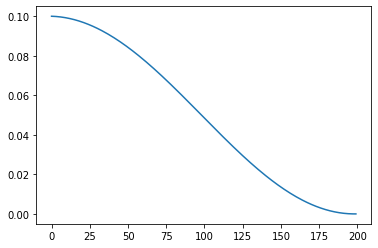

In [15]:
lrs = []
for i in range(200):
    s.step()
    lrs.append(s.get_lr())
plt.plot(lrs)

In [16]:
l = nn.Linear(5, 1)
o = optim.SGD(l.parameters(), 1e-1)
s = CosineAnnealingWarmRestarts(o, T_0=20)

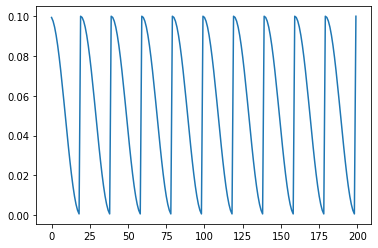

In [17]:
lrs = []
for i in range(200):
    s.step()
    lrs.append(s.get_lr())
plt.plot(lrs)

In [253]:
from torch.optim.lr_scheduler import _LRScheduler
from typing import List
import warnings


class BatchWarmupScheduler(_LRScheduler):
    """"""
    def __init__(self, optimizer: torch.optim, warmup_steps: int, last_epoch: int=-1, verbose=False) -> None:
        self.warmup_steps = warmup_steps
        super().__init__(optimizer, last_epoch, verbose)

    def get_lr(self) -> None:
        assert self.warmup_steps >= self.last_epoch, f"Number of step is more than number of warmup_steps: {self.warmup_steps}"
        if self.last_epoch == 0:
            #Settings for initial learning rate.
            return [0.0 for _ in self.optimizer.param_groups]
        elif self.last_epoch == 1:
            # Make sure that initial learning rate is correct with other schedulers.
            return [0.0 + 1/self.warmup_steps for _ in self.optimizer.param_groups]

        # After each step adding 1/self.warmup_steps.
        print(1/self.warmup_steps)
        return [1/self.warmup_steps + group["lr"] for group in self.optimizer.param_groups]


In [254]:
l = nn.Linear(5, 1)
o = optim.SGD(l.parameters(), 1.0)
s = BatchWarmupScheduler(o, 10)
s2 = CosineAnnealingLR(o, T_max=200)

print(o.param_groups[0]['lr'])

1.0


0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1


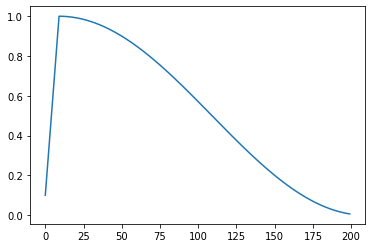

In [255]:
lrs = []
for i in range(200):
    o.step()
    if i < 10:
        s.step()
    else:
        s2.step()
    #print(o.param_groups[0]['lr'])
    lrs.append(o.param_groups[0]['lr'])
plt.plot(lrs, '-')
#print(lrs)

In [256]:
lrs

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 0.9999383162408302,
 0.9997532801828657,
 0.999444937480985,
 0.9990133642141357,
 0.9984586668665639,
 0.9977809823015399,
 0.9969804777275898,
 0.9960573506572389,
 0.9950118288582787,
 0.9938441702975688,
 0.9925546630773868,
 0.9911436253643443,
 0.9896114053108828,
 0.9879583809693736,
 0.9861849601988382,
 0.9842915805643154,
 0.9822787092288989,
 0.9801468428384714,
 0.9778965073991649,
 0.9755282581475767,
 0.9730426794137725,
 0.9704403844771127,
 0.9677220154149336,
 0.9648882429441256,
 0.9619397662556433,
 0.9588773128419904,
 0.9557016383177225,
 0.9524135262330097,
 0.9490137878803077,
 0.9455032620941838,
 0.9418828150443467,
 0.9381533400219316,
 0.9343157572190955,
 0.9303710135019717,
 0.926320082177046,
 0.9221639627510074,
 0.9179036806841351,
 0.9135402871372807,
 0.9090748587125116,
 0.9045084971874736,
 0.8998423292435452,
 0.895077506187845,


In [170]:
class StepLR(_LRScheduler):
    def __init__(self, optimizer, step_size, gamma=0.1, last_epoch=-1, verbose=False):
        self.step_size = step_size
        self.gamma = gamma
        super(StepLR, self).__init__(optimizer, last_epoch, verbose)

    def get_lr(self):
        if not self._get_lr_called_within_step:
            warnings.warn("To get the last learning rate computed by the scheduler, "
                          "please use `get_last_lr()`.", UserWarning)

        if (self.last_epoch == 0) or (self.last_epoch % self.step_size != 0):
            return [group['lr'] for group in self.optimizer.param_groups]
        return [group['lr'] * self.gamma
                for group in self.optimizer.param_groups]


In [171]:
l = nn.Linear(5, 1)
o = optim.SGD(l.parameters(), 1e-1)
s = StepLR(o, 60)

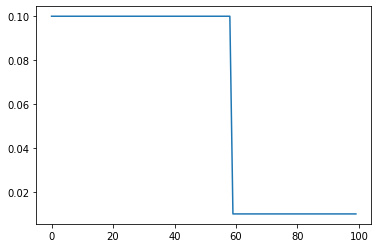

In [11]:
lrs = []
for i in range(100):
    s.step()
    lrs.append(s.get_last_lr())
plt.plot(lrs)
#print(lrs)